# Automatic slide generation

http://www.s-anand.net/blog/automating-powerpoint-with-python/

Object model:
https://msdn.microsoft.com/en-us/library/office/ff743835.aspx

Available properties:
https://msdn.microsoft.com/en-us/library/microsoft.office.interop.powerpoint.aspx

In [1]:
import win32com.client

from qtplot.data import DatFile, Data2D
from qtplot.colormap import Colormap

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os

## Make the plots

C:\Users\LocalAdmin\Miniconda2\envs\qtplot35\lib\site-packages\qtplot\colormaps/transform/Seismic.npy


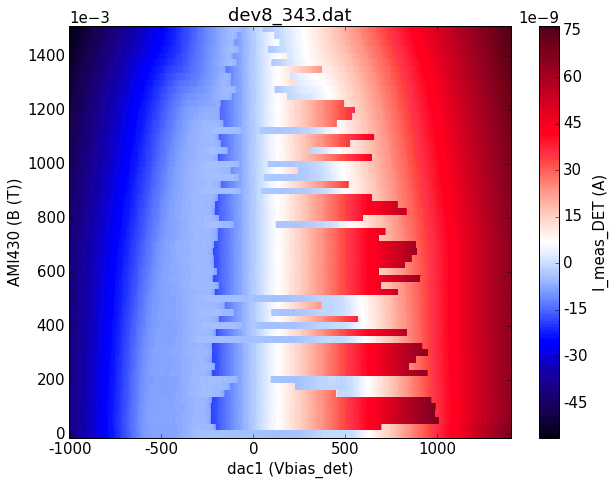

In [2]:
matplotlib.rcParams.update({'font.size': 15})
cm = Colormap('colormaps/transform/Seismic.npy')

# Needs to be an absolute path
data1 = 'C:\\Users\\LocalAdmin\\Dropbox\\QuTech\\data\\dev8_343.dat'
df = DatFile(data1)
d = df.get_data('dac1 (Vbias_det)', 'AMI430 (B (T))', 'I_meas_DET (A)')

fig, ax = plt.subplots(figsize=(9, 7))
d.plot(fig, ax, cmap=cm)
fig.savefig('plot.png')

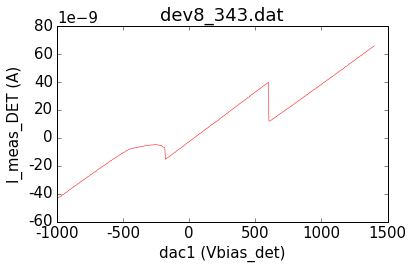

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
d.plot_linetrace(fig, ax, type='horizontal', coordinate=800e-3, color='red')
fig.savefig('linetrace.png')

## Make the slide

In [36]:
def add_image(slide, path, x, y, width, hyperlink=''):
    path = os.path.join(os.getcwd(), path)
    
    shape = slide.Shapes.AddPicture(path, False, True, x, y, -1, -1)
    
    # Change the size
    shape.LockAspectRatio = True
    shape.Width = width
    
    shape.ActionSettings[0].Hyperlink.Address = hyperlink

def add_text(slide, text, x, y, font_size):
    text = slide.Shapes.AddTextBox(1, 30, 30, 200, 200)
    text.TextFrame.TextRange.Text = 'blabla'
    text.TextFrame.TextRange.Font.Size = 30

In [40]:
# Make a connection with PowerPoint
app = win32com.client.Dispatch('PowerPoint.Application')

pres = app.ActivePresentation

# Add a slide at the end
slides = len(pres.Slides)
slide = pres.Slides.Add(slides + 1, 12)

# Set as the active slide
app.ActiveWindow.View.Slide = slide



# Make the slide
for i in range(3):
    add_image(slide, 'plot.png', 10 + 200*i, 100, width=200, hyperlink=data1)

for i in range(3):
    add_image(slide, 'linetrace.png', 10 + 200*i, 300, width=200, hyperlink=data1)
    
add_text(slide, 'Best data ever', 30, 30, font_size=30)